In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('superlig.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Takım               760 non-null    object 
 1   matchdate turkce    760 non-null    object 
 2   Comp Short          760 non-null    object 
 3   Hafta               760 non-null    int64  
 4   Season long         760 non-null    object 
 5   Match Date          760 non-null    object 
 6   Matchid             760 non-null    object 
 7   Max date            760 non-null    object 
 8   month turkce        760 non-null    object 
 9   Season              760 non-null    int64  
 10  GD                  760 non-null    int64  
 11  Goals For           760 non-null    int64  
 12  Goals For (copy)    760 non-null    int64  
 13  Maç                 760 non-null    int64  
 14  Points              760 non-null    int64  
 15  points gd2          760 non-null    int64  
 16  Shots Fo

In [11]:
df.head()

,Takım,matchdate turkce,Comp Short,Hafta,Season long,Match Date,Matchid,Max date,month turkce,Season,GD,Goals For,Goals For (copy),Maç,Points,points gd2,Shots For,X Goals For,X Goals For (copy),Şut başına xG
0,Hatayspor,22 Mayıs 2022,TUR,12,2021-22,11.07.21,ADSHAT2122,5/22/2022,Mayıs,2122,-1,0,0,1,0,-1,12,0.660021,0.660021,0.055002
1,Basaksehir,22 Mayıs 2022,TUR,22,2021-22,1/19/2022,KAYBSK2122,5/22/2022,Mayıs,2122,-1,0,0,1,0,-1,14,0.776776,0.776776,0.055484
2,Besiktas,22 Mayıs 2022,TUR,11,2021-22,10/30/2021,HATBJK2122,5/22/2022,Mayıs,2122,-1,0,0,1,0,-1,17,1.811310,1.811310,0.106548
3,Alanyaspor,22 Mayıs 2022,TUR,34,2021-22,4/25/2022,SIVALA2122,5/22/2022,Mayıs,2122,-1,0,0,1,0,-1,13,0.685834,0.685834,0.052756
4,Adana Demirspor,22 Mayıs 2022,TUR,28,2021-22,03.04.22,MLTADS2122,5/22/2022,Mayıs,2122,-1,0,0,1,0,-1,20,1.585788,1.585788,0.079289


### Goals per Game vs Points per Game

In [13]:
df = pd.DataFrame(df.groupby('Goals For')['Points'].sum() / df.groupby('Goals For')['Goals For'].count())

In [16]:
df.reset_index(inplace=True)

In [20]:
df.rename(columns={'Goals For':'Goals',0:'Points'},inplace=True)

In [21]:
df

,Goals,Points
0,0,0.250000
1,1,0.985185
2,2,2.113514
3,3,2.835443
4,4,2.857143
5,5,3.000000
6,6,3.000000
7,7,3.000000


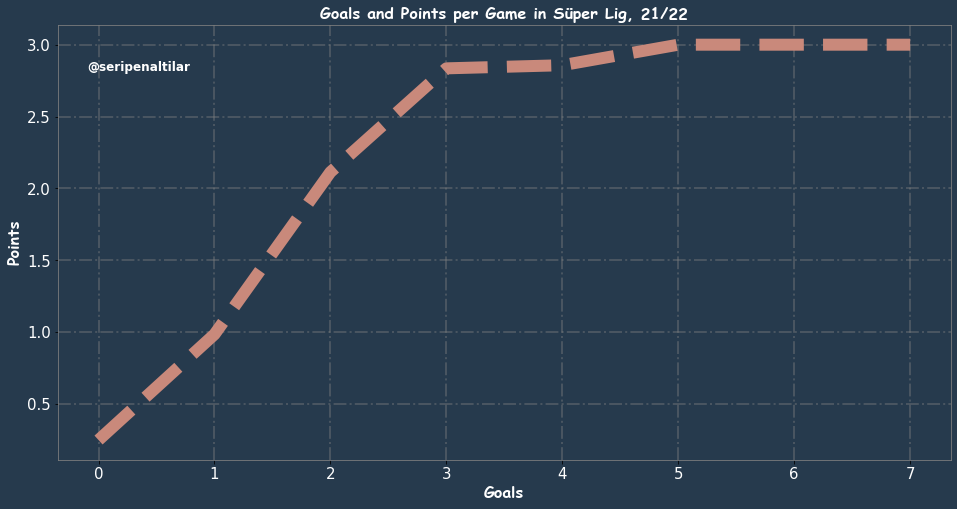

In [136]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')

plt.plot(df['Goals'],df['Points'],lw=12,ls='dashed',c='#c9897b')

ax.set_facecolor(color='#263a4d')
ax.spines[['left','bottom','right','top']].set_color('grey')

ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

ax.set_xlabel('Goals', fontdict=font)
ax.set_ylabel('Points', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')
#ax.xaxis.set_ticks(np.arange(2019, 2023, 1))
plt.title("Goals and Points per Game in Süper Lig, 21/22",fontdict=font)

plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')
plt.show()

### Marginal Points

In [35]:
df['Marginal Points']=df.diff()['Points']

In [38]:
df = df.fillna(0)

In [40]:
bar = df[df['Marginal Points']!=0]

In [166]:
bar.round(2)

,Goals,Points,Marginal Points
1,1,0.99,0.74
2,2,2.11,1.13
3,3,2.84,0.72
4,4,2.86,0.02
5,5,3.00,0.14


In [104]:
bar.groupby('Goals')['Marginal Points'].size()

Goals
1    1
2    1
3    1
4    1
5    1
Name: Marginal Points, dtype: int64

In [122]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

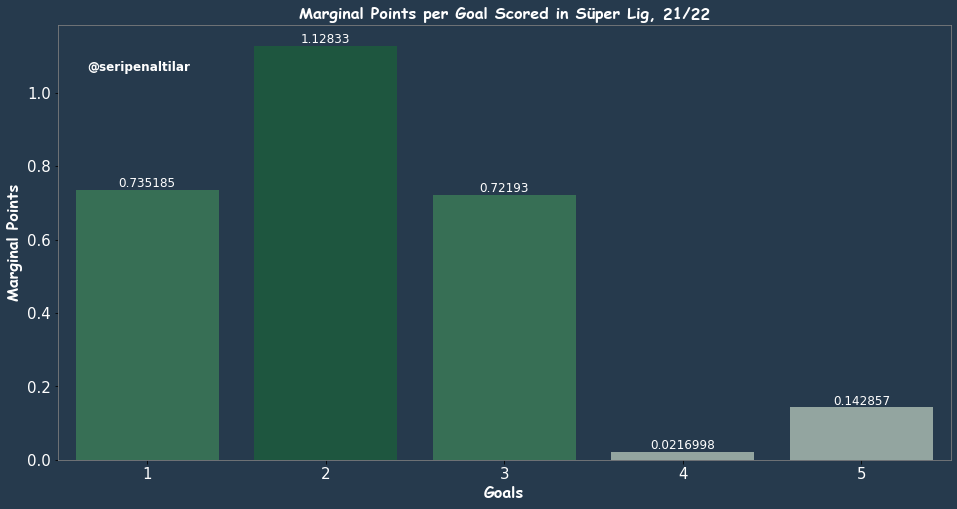

In [164]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')
y = bar['Marginal Points']
ax = sns.barplot(x="Goals", y="Marginal Points", data=bar,palette=colors_from_values(y, "Greens"),alpha=0.6)

ax.set_facecolor(color='#263a4d')
ax.spines[['left','bottom','right','top']].set_color('grey')
ax.bar_label(ax.containers[0],color='white',size=12,fmt='%g')

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

ax.set_xlabel('Goals', fontdict=font)
ax.set_ylabel('Marginal Points', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.title("Marginal Points per Goal Scored in Süper Lig, 21/22",fontdict=font)

plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')
plt.show()